## Network Science 
### Task 2

### Q1
Analyze degree distribution of Gnutella Network

In [50]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests


In [51]:
# Open a file called "data.txt" for reading
with open('C:\\Users\\ElifB\\Desktop\\568_PROJE\\p2p-Gnutella08.txt', 'r') as file:
    # Read the contents of the file into a variable
    file_contents = file.read()


In [52]:
gnutella_graph = nx.read_edgelist('C:\\Users\\ElifB\\Desktop\\568_PROJE\\p2p-Gnutella08.txt', comments='#', create_using=nx.DiGraph(), nodetype = int)
nx.nodes(gnutella_graph)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 703, 826, 1097, 1287, 1591, 1895, 1896, 1897, 1898, 1899, 144, 258, 491, 1021, 1418, 1669, 1900, 1901, 1902, 1903, 121, 127, 128, 179, 247, 249, 264, 353, 424, 426, 145, 176, 177, 753, 754, 762, 2064, 3002, 520, 665, 852, 1394, 1786, 1842, 1904, 1905, 1906, 1907, 124, 147, 246, 248, 250, 251, 252, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 2074, 809, 123, 129, 143, 367, 427, 718, 1050, 2254, 2761, 3147, 3169, 3619, 3893, 4408, 4953, 368, 717, 856, 975, 1908, 1909, 1910, 92, 1702, 1711, 1833, 1916, 1917, 1918, 1919, 1920, 1921, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 1022, 901, 960, 1511, 1624, 1836, 1911, 1912, 1913, 1914, 1915, 846, 1516, 1517, 962, 1656, 2201, 126, 174, 637, 870, 1219, 1954, 2237, 2524, 2630, 3637, 3874, 957, 1028, 1199, 1459, 1699, 1700, 1701, 1703, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 725, 1376, 2002, 2007, 2167, 2168, 2169, 2170, 614, 1378, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1604, 1679, 1930, 193

In [53]:
#gnutella_graph.nodes()
num_nodes = len(list(nx.nodes(gnutella_graph)))
print("Number of nodes: ", num_nodes)
num_edges = len(list(nx.edges(gnutella_graph)))
print("Number of edges: ", num_edges)

Number of nodes:  6301
Number of edges:  20777


In [54]:
#gnutella_graph.remove_node(1)
out_degrees = dict(gnutella_graph.out_degree()) # dictionary node:degree
in_degrees = dict(gnutella_graph.in_degree())
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
pos_in_degree_vals = list(filter(lambda val: val > 0, in_degrees.values()))
pos_total_degree_vals = pos_out_degree_vals + pos_in_degree_vals
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
uq_pos_in_degree_vals = sorted(set(pos_in_degree_vals))
uq_pos_total_degree_vals = uq_pos_out_degree_vals + uq_pos_in_degree_vals
# counting frequency of each outdegree values
total_hist = [pos_total_degree_vals.count(x) for x in uq_pos_total_degree_vals]

In [55]:
total_out_degree = 0
total_in_degree = 0
for x in out_degrees.values():
    total_out_degree += out_degrees[x]

for x in in_degrees.values():
    total_in_degree += in_degrees[x]

total_degree = total_in_degree + total_out_degree
avg_k = total_degree / num_nodes
print(avg_k)


31.12394857959054


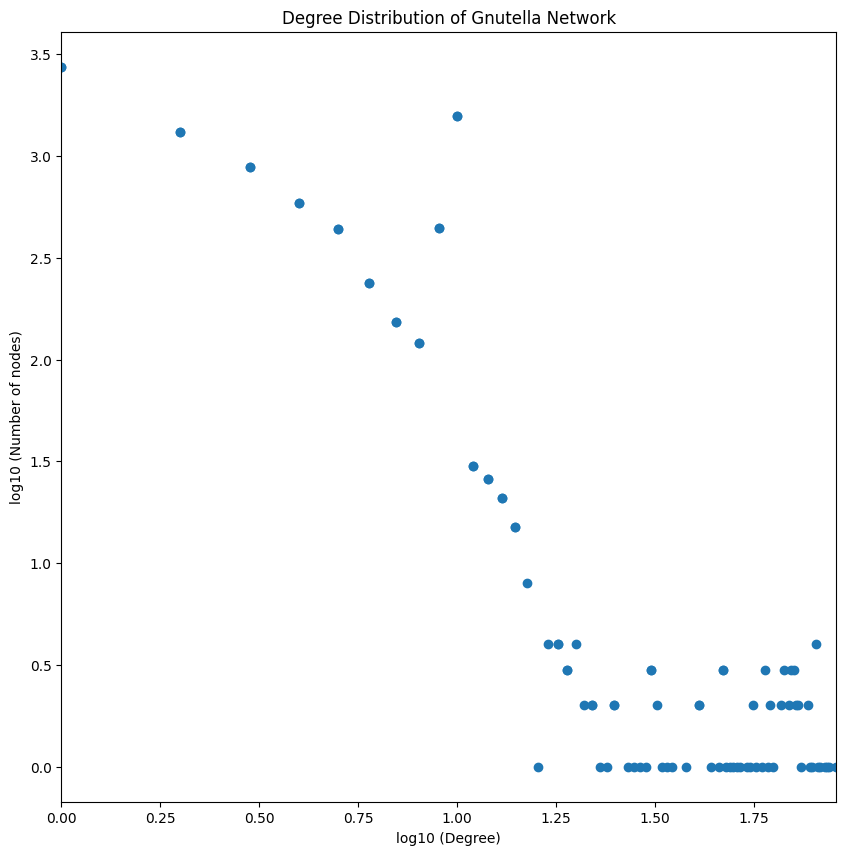

In [56]:
x = np.asarray(uq_pos_total_degree_vals, dtype = float)
y = np.asarray(total_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of Gnutella Network')
out_degree_dist = plt.plot(logx, logy, 'o')

### Q2
Create a random network and analyze its degree distribution

In [57]:
num_nodes = 10000
density = 0.0075
erdos = nx.erdos_renyi_graph(num_nodes, density, seed=np.random.randint(10))

In [58]:
degree_list = np.asarray(list(dict(erdos.degree()).values()))
degree_list

array([75, 79, 73, ..., 70, 89, 74])

In [59]:
degrees = dict(erdos.degree())
pos_degree_vals = list(filter(lambda val: val > 0, degrees.values()))
uq_pos_degree_vals = sorted(set(pos_degree_vals))
hist = [pos_degree_vals.count(x) for x in uq_pos_degree_vals]

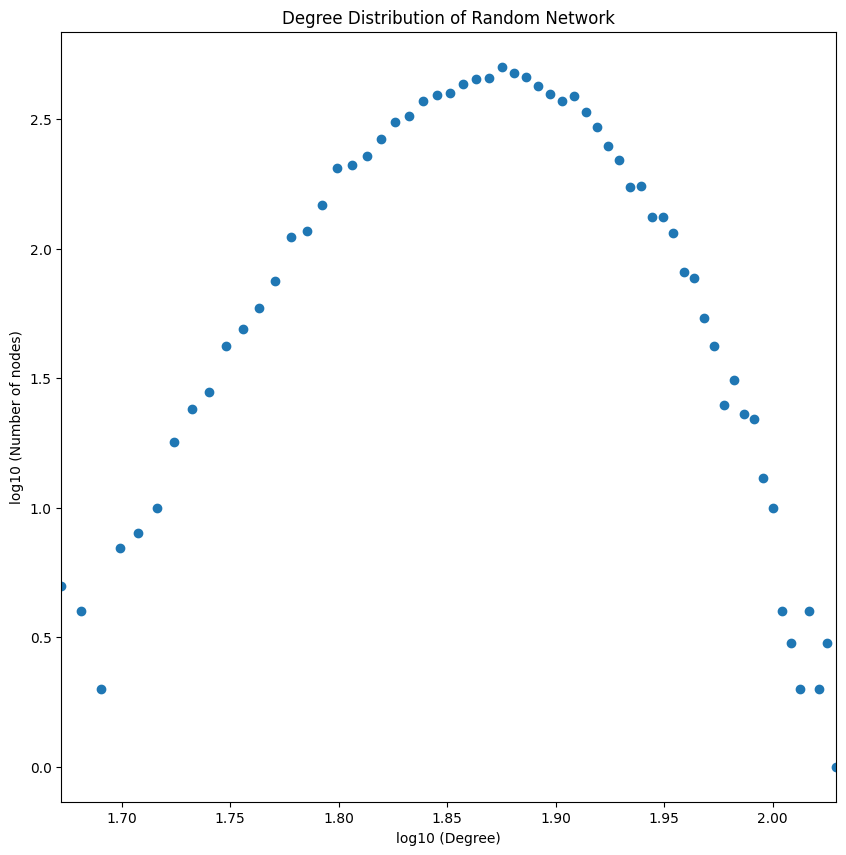

In [60]:
x = np.asarray(uq_pos_degree_vals, dtype = float)
y = np.asarray(hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Degree Distribution of Random Network')
degree_dist = plt.plot(logx, logy, 'o')

### Q3
Determine powerlaw exponent

In [61]:
from scipy import stats

# Define the x and y coordinates
x = np.asarray(uq_pos_total_degree_vals, dtype = float)
y = np.asarray(total_hist, dtype = float)


logx = np.log10(x)
logy = np.log10(y)

# Fit a linear regression model to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)

# Print the slope and intercept of the line
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -2.057154080676099
Intercept: 3.6760571035935037


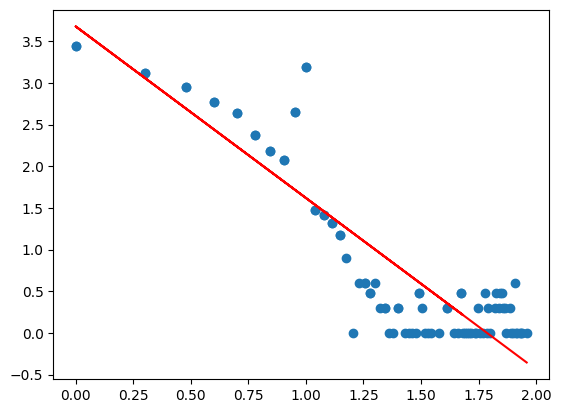

Gama değeri  -2.057154080676099  olarak bulunmuştur.


In [62]:
x = logx
y = logy

def line_func(x):
    return slope * x + intercept

# Create a plot of the data points and the line
plt.scatter(x, y)
plt.plot(x, line_func(x), color='red')
plt.show()

print("Gama değeri ", slope, " olarak bulunmuştur.")

### Q4
Find distance distribution of gnutella network.

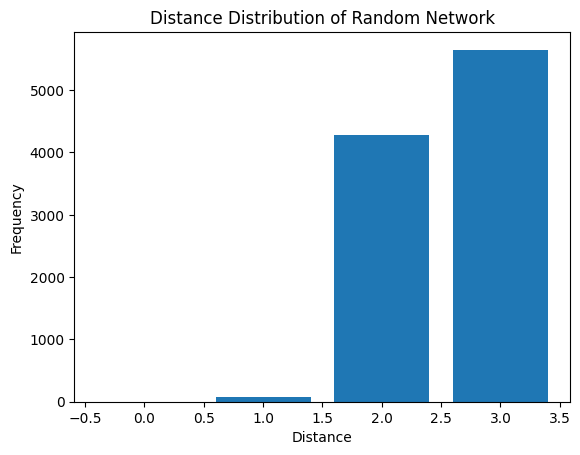

In [48]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(erdos))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(erdos))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution of Random Network')
plt.show()

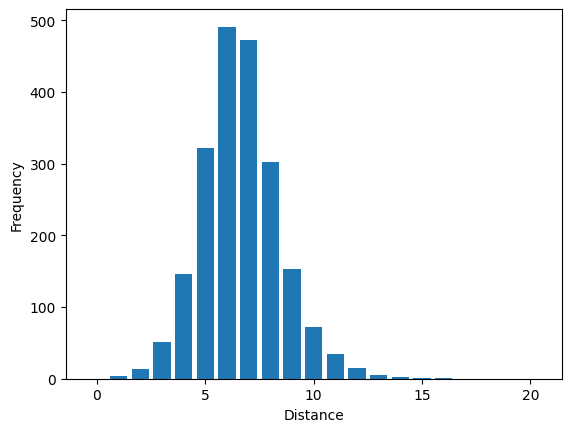

In [15]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(gnutella_graph))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(gnutella_graph))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Q5
Determine the average and maximum distance of gnutella network

In [46]:
import statistics
from itertools import chain
# This includes the isolated node!
path_lengths = (x.values() for x in dict(nx.all_pairs_shortest_path_length(gnutella_graph)).values())
print("The average distance of gnutella network is : ", statistics.mean(chain.from_iterable(path_lengths)))

The average distance of gnutella network is :  6.620836574144498


In [47]:
print("The diameter (maximum distance) of gnutella network is: ", max(distances))

The diameter (maximum distance) of gnutella network is:  20


### Q6
Determine distance distribution of a random (erdos) network.

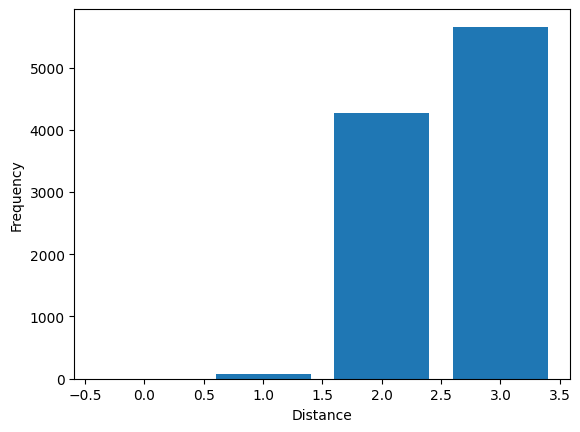

In [44]:
# calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(erdos))
# get the distance distribution
distances = []
for source, targets in shortest_path_lengths.items():
    for target, distance in targets.items():
        if source != target:
            distances.append(distance)
distance_distribution = np.histogram(distances, bins=range(max(distances)+2))[0] / float(nx.number_of_nodes(erdos))

# plot the distance distribution
plt.bar(range(len(distance_distribution)), distance_distribution)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Find the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(erdos)

# Print the average shortest path length
print(f"Average shortest path length: {avg_shortest_path_length}")

Average shortest path length: 2.557474807480748


In [27]:
diameter = nx.diameter(erdos)

# Print the diameter
print(f"Diameter: {diameter}")

Diameter: 3


### Q7
Determine whether gnutella network is small world or ultra small world. 

<img src="small_world.png" alt="Small World" style="width: 500px; height: 300px;">